<a href="https://colab.research.google.com/github/Zapatannicolas/Python-Data-Science-TP/blob/main/Zapata_Nicolas_TpDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTEXTO Y OBJETIVO:

Una concesionaria de automoviles necesita que analicemos: la potencia de los automoviles, como se distribuye el consumo de combustible y como son los precios dependiendo el fabricante y realizar una prediccion sobre los precios.

Para ello contamos con un dataset con informacion acerca de los autos y sus ventas.


> LINK DEL DATASET: https://www.kaggle.com/gagandeep16/car-salesBloc 




# CARGA DE DATOS

Importamos las librerias

In [ ]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import IPython 
import seaborn as sns


Importamos el dataset

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lo leemos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP-DS-NICOLAS-ZAPATA/Car_sales.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


# EXPLORACION DE DATOS:
El dataset nos provee los siguientes datos:

*   Manufacturer/Fabricante: Cualitativa nominal
*   Model/Modelo: Cualitativa nominal
*   Sales_in_thiusands/Ventas en miles: Cuantitativa continua
*   year_resale_value/valor de reventa anual: Cuantitativa continua
*   vehicle_type/tipo de vehiculo: Cualitativa nominal binaria
*   price_in_thousands/precio en miles: Cuantitativa continua
*   engine_size/tamaño del motor: Cuantitativa continua
*   Horsepower/caballos de fuerza: Cuantitativa discreta
*   Wheelbase/distancia entre sus ruedas: Cuantitativa continua
*   Width/ancho: Cuantitativa continua
*   Lenght/largo: Cuantitativa continua
*   curb_weight/peso del vehiculo: Cuantitativa continua
*   Fuel_capacity: capacidad de combustible: Cuantitativa continua
*   Fuel_efficience/eficiencia del tanque: Cuantitativa
*   Latest_launch/fecha ult lanzamiento: Cuantitativa continua
*   Power_perf_factor/rendimiento: Cuantitativa continua















Cantidad de filas y columnas

In [ ]:
df.shape

(157, 16)

cantidad de valores nulos, 0, unicos y tipos de datos

In [ ]:
def status(data):

    data2=data

    tot_rows=len(data2)
    
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    d2['q_zeros']=(data2==0).sum().values

    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    d2['unique']=data2.nunique().values
    
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Manufacturer,0,0.000000,0,0.0,30,object
1,Model,0,0.000000,0,0.0,156,object
2,Sales_in_thousands,0,0.000000,0,0.0,157,float64
3,__year_resale_value,36,0.229299,0,0.0,117,float64
4,Vehicle_type,0,0.000000,0,0.0,2,object
5,Price_in_thousands,2,0.012739,0,0.0,152,float64
6,Engine_size,1,0.006369,0,0.0,31,float64
7,Horsepower,1,0.006369,0,0.0,66,float64
8,Wheelbase,1,0.006369,0,0.0,88,float64
9,Width,1,0.006369,0,0.0,78,float64


Verificamos que no hayan datos duplicados

In [ ]:
df.drop_duplicates(keep ='last')
df.shape

(157, 16)

Eliminamos valores nulos

In [ ]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

Eliminamos la columna year_resale ya que contine bastantes nulos y no es considerada necesaria para el analisis

In [ ]:
drop_cols = ['__year_resale_value']
df = df.drop(drop_cols, axis = 1)


In [ ]:
len(df.columns)

15

Medidas de tendencia central para la potencia del vehiculo

In [ ]:
print("Potencia media:", df["Horsepower"].mean())
print("Potencia maxima:", df["Horsepower"].max())
print("Potencia minima:", df["Horsepower"].min())

Potencia media: 185.94871794871796
Potencia maxima: 450.0
Potencia minima: 55.0


In [ ]:
def max_min_val(col):
  
    primero = df[col].idxmax()
    primer_obs = pd.DataFrame(df.loc[primero])
    
    last = df[col].idxmin()
    last_obs = pd.DataFrame(df.loc[last])
    
    min_max_obs = pd.concat([primer_obs, last_obs], axis=1)
    
    return min_max_obs
    


In [ ]:
max_min_val('Horsepower')

,39,26
Manufacturer,Dodge,Chevrolet
Model,Viper,Metro
Sales_in_thousands,0.916,21.855
Vehicle_type,Passenger,Passenger
Price_in_thousands,69.725,9.235
Engine_size,8.0,1.0
Horsepower,450.0,55.0
Wheelbase,96.2,93.1
Width,75.7,62.6
Length,176.7,149.4


Ordenados por potencia

In [ ]:
df_sort = df.sort_values(by = 'Horsepower', ascending = False)
df_sort.head(9)

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
39,Dodge,Viper,0.916,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
24,Chevrolet,Corvette,17.947,Passenger,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,5/12/2012,141.141150
6,Audi,A8,1.380,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
99,Mercedes-B,CL500,0.954,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
95,Mercedes-B,SL-Class,3.311,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294
78,Lincoln,Navigator,22.925,Car,42.660,5.4,300.0,119.0,79.9,204.8,5.393,30.0,15.0,12/23/2012,123.972047
72,Lexus,GS400,3.334,Passenger,46.305,4.0,300.0,110.2,70.9,189.2,3.693,19.8,21.0,11/28/2012,125.013357
125,Porsche,Carrera Coupe,1.280,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
126,Porsche,Carrera Cabrio,1.866,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,7/11/2011,135.914710


Relacion entre el tamaño del motor y los caballos de fuerza

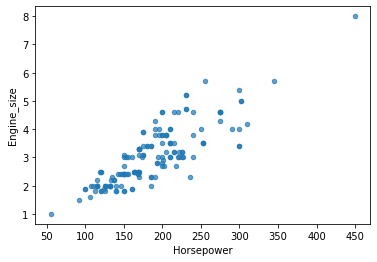

In [ ]:
df.plot.scatter("Horsepower", "Engine_size", alpha=0.7);

Distribucion de automoviles segun su consumo de combustible

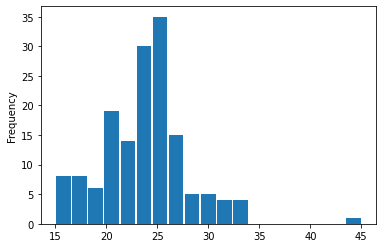

In [ ]:
df.Fuel_efficiency.plot.hist(bins=19, grid=False, rwidth=0.90);

Precio promedio por fabricante

In [ ]:
df.groupby("Manufacturer")["Price_in_thousands"].mean().sort_values(ascending=False)*1000

Manufacturer
Porsche       62473.333333
Mercedes-B    52916.666667
Lexus         44055.000000
Jaguar        42800.000000
Lincoln       41690.000000
Cadillac      40254.000000
Audi          39980.000000
BMW           33096.666667
Volvo         30933.333333
Acura         30633.333333
Saab          29610.000000
Infiniti      29465.000000
Buick         26781.250000
Oldsmobile    25622.833333
Dodge         24213.636364
Chrysler      23430.833333
Pontiac       22949.166667
Plymouth      22642.500000
Nissan        22360.714286
Mitsubishi    22167.428571
Toyota        21982.888889
Subaru        21395.000000
Ford          21047.272727
Jeep          20991.666667
Mercury       20748.333333
Honda         20277.000000
Chevrolet     20022.777778
Volkswagen    17698.333333
Saturn        14271.000000
Hyundai       12165.666667
Name: Price_in_thousands, dtype: float64

Trabajamos los valores nulos

In [ ]:
def clean_missing(df):
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    
    df_missing_values=df.isnull().sum()
    
    df_numeric_columns=df.select_dtypes(include=["int64","float64"]).keys()
    columns_numeric_missing=[var for var in df_numeric_columns if df_missing_values[var]>0]
    
    df_categorical_columns=df.select_dtypes(include=["object"]).keys()
    columns_categorical_missing=[var for var in df_categorical_columns if df_missing_values[var]>0]
    
    numeric_value_mean_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy='mean'))])

    categorical_value_mode_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent'))])

    preprocessing=ColumnTransformer(transformers=[("mean_imputer", numeric_value_mean_imputer, columns_numeric_missing),
                                              ("mode_imputer", categorical_value_mode_imputer, columns_categorical_missing)])
    df_clean_null_value=preprocessing.fit_transform(df)
    
    df_missing_value_solve=pd.DataFrame(df_clean_null_value, columns=columns_categorical_missing+columns_numeric_missing)
    
    df.update(df_missing_value_solve)
    
    return df

In [ ]:
df=clean_missing(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   157 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


# Prediccion del precio por potencia

para ello utilizaremos el modelo de regresion lineal

ENTRENAMIENTO:

In [ ]:
explicativas = df[['Horsepower']]

In [ ]:
objetivo = df['Price_in_thousands']

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X=explicativas, y=objetivo)

LinearRegression()

In [ ]:
model.__dict__

{'_residues': 9420.708052171867,
 'coef_': array([0.21153784]),
 'copy_X': True,
 'feature_names_in_': array(['Horsepower'], dtype=object),
 'fit_intercept': True,
 'intercept_': -11.944434583163229,
 'n_features_in_': 1,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'rank_': 1,
 'singular_': array([705.91330186])}

PREDICCION

In [ ]:
model.predict(X=df[['Horsepower']])

array([17.67086247, 35.65157854, 35.65157854, 32.478511  , 19.78624083,
       30.36313264, 53.63229461, 24.01699756, 28.88236779, 28.88236779,
       25.07468674, 38.82464608, 31.42082182, 31.42082182, 46.22847035,
       46.22847035, 46.22847035, 30.36313264, 41.99771362, 12.38241657,
       24.01699756, 25.07468674, 26.13237592, 30.36313264, 61.03611887,
       13.44010575, -0.3098536 , 26.13237592, 22.5362327 , 23.59392188,
       30.36313264, 15.97855978, 41.57463795, 27.39075484, 41.57463795,
       15.97855978, 22.5362327 , 23.59392188, 30.78620831, 83.24759167,
       36.70926772, 25.07468674, 25.07468674, 13.44010575, 36.70926772,
       19.78624083, 11.32472739, 28.24775428, 24.01699756, 20.84393001,
       10.69011388, 30.36313264, 32.478511  , 19.78624083, 38.82464608,
       13.22856791, 34.59388936, 10.47857604, 16.61317329, 18.94008949,
       31.42082182, 32.478511  ,  7.51704634, 17.67086247, 19.36316516,
       36.07465421, 38.82464608, 13.44010575, 28.24775428, 29.30

In [ ]:
y_pred = model.predict(X=df[['Horsepower']])

In [ ]:
df.insert(0,'pred',y_pred)

In [ ]:
df

,pred,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,17.670862,Acura,Integra,16.919,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,35.651579,Acura,TL,39.384,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,35.651579,Acura,CL,14.114,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,77.043591
3,32.478511,Acura,RL,8.588,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,19.786241,Audi,A4,20.397,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,21.901619,Volvo,V40,3.545,Passenger,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,23.593922,Volvo,S70,15.245,Passenger,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,23.593922,Volvo,V70,17.531,Passenger,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,37.978495,Volvo,C70,3.493,Passenger,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


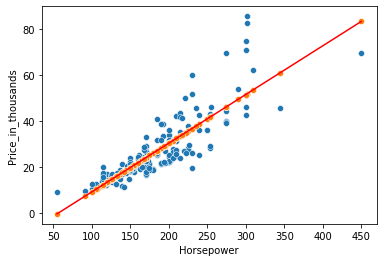

In [ ]:
sns.scatterplot(x='Horsepower', y='Price_in_thousands', data=df)
sns.scatterplot(x='Horsepower', y='pred', data=df)
sns.lineplot(x='Horsepower', y='pred', data=df, color='red')

In [ ]:
model.score(X=explicativas, y=objetivo)

0.7029982814058726